<div style="text-align: center;">
<h1> Trabajo Práctico </font></h1>
<h2> Aprendizaje de Maquina (CEIA) </font></h2>
<h3>Abril Noguera - José Roberto Castro</font></h3>
</div>

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve

In [ ]:
#Leo el csv y lo guardo en un df
df = pd.read_csv('airbnb_cleaned.csv')

In [112]:
# Información general del dataset
print("Shape del dataset:", df.shape)
print("\nColumnas:")
print(df.columns.tolist())

Shape del dataset: (31390, 88)

Columnas:
['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_rev

In [113]:
# Tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 88 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31390 non-null  int64  
 1   listing_url                                   31390 non-null  object 
 2   scrape_id                                     31390 non-null  int64  
 3   last_scraped                                  31390 non-null  object 
 4   source                                        31390 non-null  object 
 5   name                                          31387 non-null  object 
 6   description                                   30668 non-null  object 
 7   neighborhood_overview                         14831 non-null  object 
 8   picture_url                                   31390 non-null  object 
 9   host_id                                       31390 non-null 

In [114]:
# Muestra de 5 filas aleatorias
df.sample(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,verif_work_email,occupation_rate,occupated,log_price,log_minimum_nights,log_maximum_nights,log_minimum_minimum_nights,log_maximum_minimum_nights,log_minimum_maximum_nights,log_maximum_maximum_nights
8513,547831661704173143,https://www.airbnb.com/rooms/547831661704173143,20250129142212,2025-01-30,city scrape,Agradable Apto de 2 Ambientes en Recoleta,"Nice, two-room apartment in the best of Reclet...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,132838002,...,0,0.033333,0,3.596256,3.367296,5.902633,3.367296,3.367296,5.902633,5.902633
21954,1069618242553216849,https://www.airbnb.com/rooms/1069618242553216849,20250129142212,2025-01-30,city scrape,Apartamento excelente ubicaci n,Base this home and you'll be a step away from ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,556635927,...,0,0.266667,0,3.220156,0.693147,5.902633,0.693147,0.693147,5.902633,5.902633
30400,1313661703829906322,https://www.airbnb.com/rooms/1313661703829906322,20250129142212,2025-01-30,city scrape,Habitaciones en el centro,"Enjoy the warmth of this quiet, downtown home.",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,51356071,...,0,0.016667,0,2.854578,0.693147,5.902633,0.693147,0.693147,5.902633,5.902633
11840,763157108488317280,https://www.airbnb.com/rooms/763157108488317280,20250129142212,2025-01-30,city scrape,Hermoso departamento en Palermo,Excellent location in Palermo Hollywood and st...,NaN,https://a0.muscache.com/pictures/f8c7cc97-a164...,1263834,...,0,1.000000,1,3.069079,1.386294,5.902633,1.386294,1.386294,5.902633,5.902633
980,4111032,https://www.airbnb.com/rooms/4111032,20250129142212,2025-01-30,city scrape,Amazing Palermo Hollywood Apartment,Temporary Rent in Bs.As. Palermo Hollywwod Lux...,Palermo is without question the best place to ...,https://a0.muscache.com/pictures/4290725b-df6c...,21329459,...,0,1.000000,1,3.434183,3.044522,5.902633,1.791759,3.044522,5.902633,5.902633


In [115]:
# Estadísticas para columnas numéricas
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,31390.0,NaN,NaN,NaN,733216778496515584.0,478686306430168000.0,11508.0,52109635.5,903505928491891712.0,1105178606876347904.0,1344330090094885632.0
listing_url,31390,31390,https://www.airbnb.com/rooms/11508,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scrape_id,31390.0,NaN,NaN,NaN,20250129142212.0,0.0,20250129142212.0,20250129142212.0,20250129142212.0,20250129142212.0,20250129142212.0
last_scraped,31390,4,2025-01-30,22543,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,31390,1,city scrape,31390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
log_maximum_nights,31390.0,NaN,NaN,NaN,5.441877,1.254465,0.693147,4.51086,5.902633,5.902633,11.512925
log_minimum_minimum_nights,31390.0,NaN,NaN,NaN,1.297601,0.661406,0.693147,0.693147,1.098612,1.386294,6.594413
log_maximum_minimum_nights,31390.0,NaN,NaN,NaN,1.381248,0.689265,0.693147,1.098612,1.386294,1.609438,6.594413
log_minimum_maximum_nights,31390.0,NaN,NaN,NaN,5.885202,1.30946,0.693147,5.902633,5.902633,7.026427,7.509883


In [ ]:
features = [
    'latitude', 'longitude', 'property_type', 'room_type',
    'accommodates', 'bedrooms', 'beds',
    'price', 'minimum_nights', 'maximum_nights',
    'number_of_reviews', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value',
    'instant_bookable', 'host_is_superhost',
    'host_listings_count', 'host_total_listings_count',
    'city'
]

df_model = df[features + ['occupation_rate']].copy()

# Crear la variable binaria de ocupacion alta
df_model['high_occupancy'] = (df_model['occupation_rate'] > 0.8).astype(int)

In [117]:
# Verifica nulos
print(df_model.isnull().sum().sort_values(ascending=False).head(10))

latitude                     0
review_scores_cleanliness    0
occupation_rate              0
city                         0
host_total_listings_count    0
host_listings_count          0
host_is_superhost            0
instant_bookable             0
review_scores_value          0
review_scores_location       0
dtype: int64


In [118]:
# Separar target
X = df_model.drop(columns=['occupation_rate', 'high_occupancy'])
y = df_model['high_occupancy']

# Variables categóricas y numéricas
cat_cols = ['city', 'property_type', 'room_type']
num_cols = [col for col in X.columns if col not in cat_cols]

# Preprocesador
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols)
])

# Pipeline con RandomForest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar
pipeline.fit(X_train, y_train)

# Predicciones
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluacion
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      5073
           1       0.57      0.02      0.04      1205

    accuracy                           0.81      6278
   macro avg       0.69      0.51      0.47      6278
weighted avg       0.76      0.81      0.73      6278

Confusion Matrix:
 [[5054   19]
 [1180   25]]
ROC AUC Score: 0.6801701792828848


/Users/jose.castro/TP-AMq/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jose.castro/TP-AMq/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


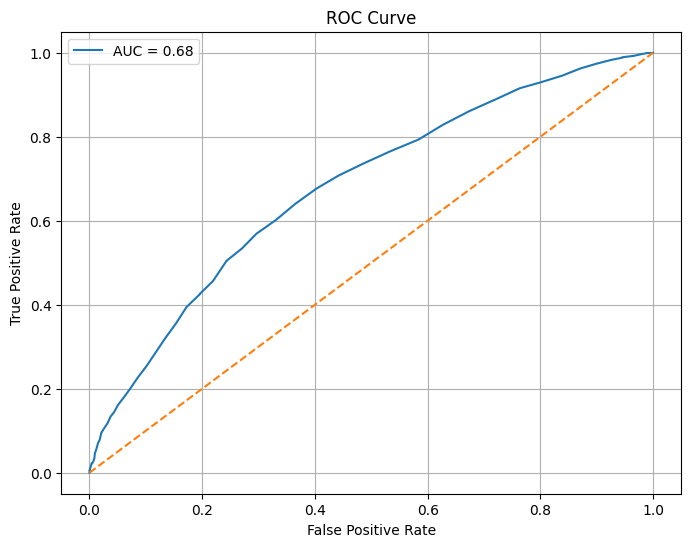

In [119]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [120]:
# Ajustar el umbral
threshold = 0.3
y_pred_adjusted = (y_proba > threshold).astype(int)

# Evaluar con el nuevo umbral
print("Classification Report (threshold=0.3):\n", classification_report(y_test, y_pred_adjusted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))

Classification Report (threshold=0.3):
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      5073
           1       0.37      0.25      0.30      1205

    accuracy                           0.77      6278
   macro avg       0.60      0.58      0.58      6278
weighted avg       0.75      0.77      0.76      6278

Confusion Matrix:
 [[4557  516]
 [ 898  307]]


In [121]:
from sklearn.utils import resample

# Separar clases
df_majority = df_model[df_model.high_occupancy == 0]
df_minority = df_model[df_model.high_occupancy == 1]

# Duplicar clase minoritaria
df_minority_upsampled = resample(
    df_minority,
    replace=True,            # muestras con reemplazo
    n_samples=len(df_majority),  # igualar número de muestras
    random_state=42
)

# Concatenar
df_balanced = pd.concat([df_majority, df_minority_upsampled])

In [122]:
# -------- Preparar X e y -------- #
X = df_balanced.drop(columns=['occupation_rate', 'high_occupancy'])
y = df_balanced['high_occupancy']

# Identificar columnas categóricas y numéricas
cat_cols = ['city', 'property_type', 'room_type']
num_cols = [col for col in X.columns if col not in cat_cols]

# Preprocesamiento
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols)
])

# Pipeline de entrenamiento
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))  # Opcional pero no interfiere
])

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
pipeline.fit(X_train, y_train)

# Predicciones
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

# Evaluación
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


/Users/jose.castro/TP-AMq/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jose.castro/TP-AMq/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      5069
           1       0.96      0.97      0.97      5072

    accuracy                           0.97     10141
   macro avg       0.97      0.97      0.97     10141
weighted avg       0.97      0.97      0.97     10141

Confusion Matrix:
 [[4870  199]
 [ 145 4927]]
ROC AUC Score: 0.9904232475124046


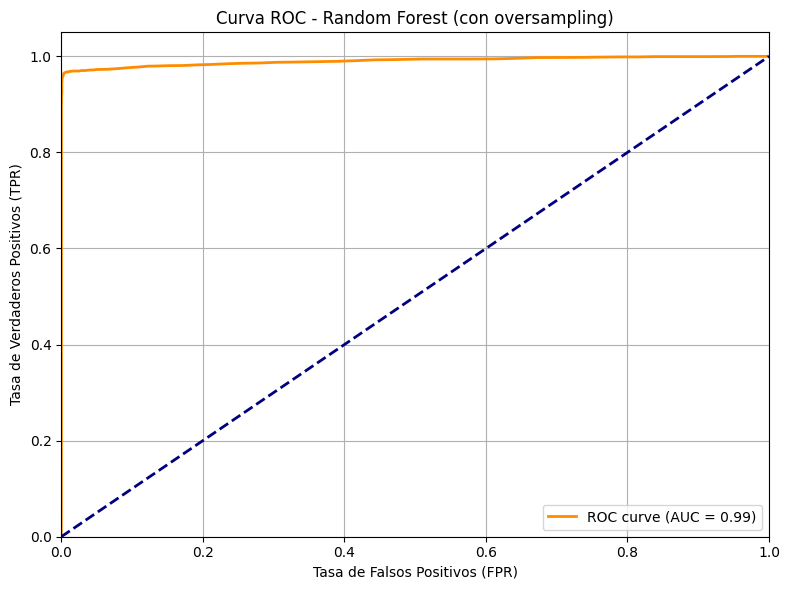

In [123]:
from sklearn.metrics import roc_curve, auc

# Calcular valores de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest (con oversampling)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [124]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print("F1 scores:", scores)
print("Average F1:", scores.mean())

/Users/jose.castro/TP-AMq/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jose.castro/TP-AMq/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jose.castro/TP-AMq/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


F1 scores: [0.87819656 0.94007455 0.95814226 0.95128106 0.92800454]
Average F1: 0.9311397915744701


/Users/jose.castro/TP-AMq/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


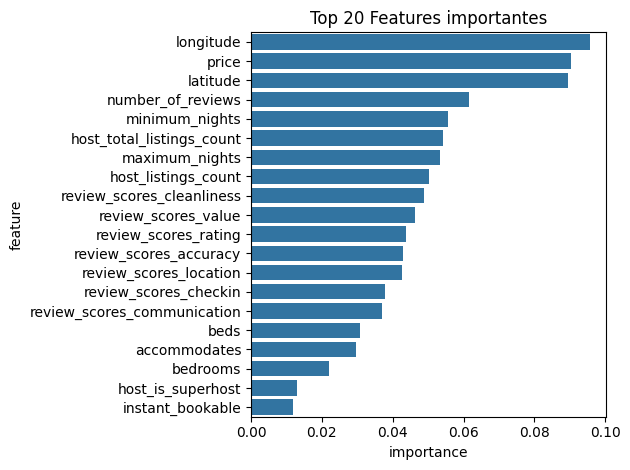

In [125]:
importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = pipeline.named_steps['preprocessor'].transformers_[0][2] + \
                list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_cols))

feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

sns.barplot(data=feature_importance_df.head(20), x='importance', y='feature')
plt.title("Top 20 Features importantes")
plt.tight_layout()
plt.show()

La ubicación geográfica (latitude, longitude) es clave para la ocupación (lo cual tiene mucho sentido).

Precio y políticas también son muy influyentes.

Las reseñas (cantidad y puntajes) impactan significativamente en la ocupación.

In [126]:
# Tomar una muestra
new_sample = df_model.sample(1).drop(columns=['occupation_rate', 'high_occupancy'])

# Predecir probabilidad de alta ocupación
pred_prob = pipeline.predict_proba(new_sample)[0][1]
pred_class = pipeline.predict(new_sample)[0]

print(f"Probabilidad de alta ocupación: {pred_prob:.2f}")
print(f"Predicción final: {'Alta ocupación' if pred_class == 1 else 'Baja ocupación'}")

Probabilidad de alta ocupación: 0.41
Predicción final: Baja ocupación


In [127]:
for i in range(5):
    new_sample = df_model.sample(1).drop(columns=['occupation_rate', 'high_occupancy'])
    pred_prob = pipeline.predict_proba(new_sample)[0][1]
    pred_class = pipeline.predict(new_sample)[0]
    print(f"{i+1}) Probabilidad: {pred_prob:.2f} | Predicción: {'Alta' if pred_class == 1 else 'Baja'}")

1) Probabilidad: 0.16 | Predicción: Baja
2) Probabilidad: 0.07 | Predicción: Baja
3) Probabilidad: 0.02 | Predicción: Baja
4) Probabilidad: 0.22 | Predicción: Baja
5) Probabilidad: 0.97 | Predicción: Alta


/Users/jose.castro/TP-AMq/venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/jose.castro/TP-AMq/venv/lib/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jose.castro/TP-AMq/venv/lib/python3.13/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_per

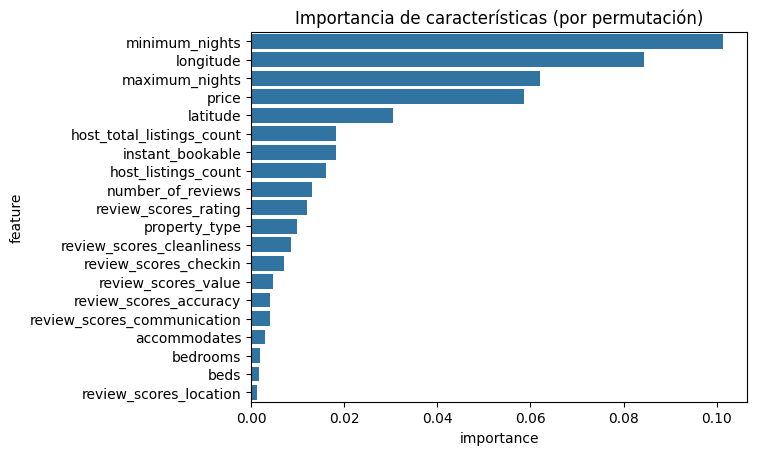

In [131]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    pipeline, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

importances_df = pd.DataFrame({
    "feature": X.columns,
    "importance": result.importances_mean
}).sort_values(by="importance", ascending=False)

sns.barplot(data=importances_df.head(20), x="importance", y="feature")
plt.title("Importancia de características (por permutación)")
plt.show()

Estas son las 20 variables más influyentes en la predicción de alta ocupación, ordenadas por su impacto en la métrica del modelo:

In [132]:
importances_df.head(20)

,feature,importance
8,minimum_nights,0.101450
1,longitude,0.084351
9,maximum_nights,0.062114
7,price,0.058663
0,latitude,0.030589
21,host_total_listings_count,0.018262
18,instant_bookable,0.018243
20,host_listings_count,0.016044
10,number_of_reviews,0.013194
11,review_scores_rating,0.012040


Para experimentar, quitaré columnas con importance < 0.005 para ver si mejora la performance

In [133]:
low_importance = feature_importance_df[feature_importance_df['importance'] < 0.005]['feature'].tolist()

In [134]:
for i in range(5):
    new_sample = df_model.sample(1).drop(columns=['occupation_rate', 'high_occupancy'])
    proba = pipeline.predict_proba(new_sample)[0][1]
    pred = pipeline.predict(new_sample)[0]
    print(f"{i+1}) Prob: {proba:.2f} → {'Alta' if pred else 'Baja'}")

1) Prob: 0.12 → Baja
2) Prob: 0.05 → Baja
3) Prob: 0.41 → Baja
4) Prob: 0.18 → Baja
5) Prob: 0.09 → Baja


In [136]:
X_test['predicted'] = y_pred
X_test['actual'] = y_test.values
X_test['error'] = X_test['predicted'] != X_test['actual']

# Ver errores por tipo de propiedad
print(X_test[X_test['error'] == True]['property_type'].value_counts())

property_type
Entire rental unit             267
Entire condo                    34
Entire loft                     11
Private room in home            10
Private room in rental unit      7
Entire serviced apartment        6
Entire home                      4
Entire vacation home             3
Entire townhouse                 1
Entire cabin                     1
Name: count, dtype: int64


La mayoría de errores se dan en propiedades enteras, probablemente porque:

- Estas propiedades son muy comunes, por lo que el modelo puede tener dificultades para distinguir los detalles que marcan la diferencia en ocupación.

- Sus precios, reseñas o disponibilidad tienen una alta varianza, lo cual puede enmascarar patrones.